In [1]:
from rnn_dbscan import RNN_DBSCAN

import pandas as pd
import numpy as np

import folium

import datetime
import os

In [2]:
from pyCFOF import ConcentrationFreeOutlierFactor as CFOF
from sklearn.neighbors import LocalOutlierFactor

In [3]:
def generate_folder_name(region: str, maxRadius: str, apply_algo_3: bool = False) -> str:
    if maxRadius-int(maxRadius) > 0:
        number_dec = str(maxRadius-int(maxRadius))[2:]
        folder_name = f"{region}_{int(maxRadius)}-{number_dec}"
    else:
        folder_name =  f"{region}_{int(maxRadius)}"
    if apply_algo_3:
        return folder_name + "_algo_3"
    return folder_name

In [4]:
import os

PROJECT_FOLDER = "C:/Users/Lucas.Foulon/Documents/Codes_brouillons/MAP_STOPS_Kmeans_kNN"
LOCAL_DATA_FOLDER = os.path.join(PROJECT_FOLDER, "data/")
LOCAL_DATA_PLACE_FOLDER = os.path.join(LOCAL_DATA_FOLDER, "place/")

maxRadius = 15 # en km
region = "wallonie"
without_interchange = True # choose if consider interchanges or not
apply_algo_3 = True # choose between "algo 2" and "algo 2 & 3"
number_dec = str(maxRadius-int(maxRadius))[2:]
folder_name = generate_folder_name(region, maxRadius, apply_algo_3)
LOCAL_DATA_CLUSTER_ANDRIENKO = os.path.join(LOCAL_DATA_FOLDER, "clustering_andrienko/")
path_name = os.path.join(LOCAL_DATA_CLUSTER_ANDRIENKO, folder_name)


In [5]:
start_date = datetime.datetime(2021, 1, 4, 0 ,0, 0)
end_date = datetime.datetime(2021, 1, 15, 0 ,0, 0)

In [6]:
df_place = pd.read_csv(f'{LOCAL_DATA_PLACE_FOLDER}/'+\
    f'{start_date.strftime("%Y_%m_%d_%H_%M_%S")}__{end_date.strftime("%Y_%m_%d_%H_%M_%S")}.csv', 
    index_col=0)
df_place_with_results = pd.read_csv(f'{path_name}/'+\
        f'{start_date.strftime("%Y_%m_%d_%H_%M_%S")}__{end_date.strftime("%Y_%m_%d_%H_%M_%S")}.csv')

df_stops = df_place[df_place.LOCATIONTYPE == 0]
del df_place

In [7]:
print(df_place_with_results.CENTROID_NUMBER.value_counts())
df_new_place = df_place_with_results[df_place_with_results.CENTROID_NUMBER == 69]
df_new_place[['LATITUDE', 'LONGITUDE']].shape

69    2888
38    2044
39    1508
37    1126
33    1123
      ... 
19     181
6      174
72     172
45     147
2       70
Name: CENTROID_NUMBER, Length: 81, dtype: int64


(2888, 2)

In [8]:
df_stops

,ID,NAME,STARTDATE,ENDDATE,LATITUDE,LONGITUDE,LOCATIONTYPE,PARENTSTOPID,ZONEID,ISSIMULATED,NATUREID,CATEGORYID
0,1212201354509282819,AUTRE-EGLISE Eglise,2018-04-28 00:00:00,NaN,50.663079,4.923704,0,NaN,NaN,0,101,100
1,1003232626316087904,AUTRE-EGLISE Eglise,2018-04-28 00:00:00,NaN,50.663151,4.923620,0,NaN,NaN,0,101,100
2,465843385415904301,AUTRE-EGLISE Gare,2018-04-28 00:00:00,2020-07-31 03:30:00,50.663857,4.918398,0,NaN,NaN,0,101,100
3,481225099414766829,AUTRE-EGLISE Gare,2018-04-28 00:00:00,NaN,50.663964,4.918366,0,NaN,NaN,0,101,100
4,1399960361370934430,AUTRE-EGLISE Rue de la Mêlée 50,2018-04-28 00:00:00,2020-07-31 03:30:00,50.659463,4.909406,0,NaN,NaN,0,101,100
...,...,...,...,...,...,...,...,...,...,...,...,...
45712,717629379903332802,MONCEAU-SUR-SAMBRE Nouvelle Cité,2020-10-22 04:00:00,NaN,50.420776,4.380455,0,NaN,NaN,0,101,100
45713,957004514650874577,BRAINE-L'ALLEUD Paradis,2020-10-16 04:00:00,NaN,50.671097,4.368536,0,NaN,NaN,0,101,100
45714,347487531726036824,MARCHIENNE-AU-PONT Rue Delire,2020-10-22 04:00:00,NaN,50.408519,4.394582,0,NaN,NaN,0,101,100
45715,1162348327821860594,JAMBES Rue des Fougères,2021-01-28 04:00:00,NaN,50.439334,4.888940,0,NaN,NaN,0,101,100


In [9]:
df_new_place[['LATITUDE', 'LONGITUDE']].head()

,LATITUDE,LONGITUDE
6842,50.617611,5.488027
6843,50.617643,5.488462
6848,50.623105,5.508096
6849,50.622929,5.507861
6850,50.620209,5.511054


In [10]:
k = 20
my_clustering = RNN_DBSCAN(X=df_new_place[['LATITUDE', 'LONGITUDE']].to_numpy(), k=k)
labels = my_clustering.rnn_dbscan()

In [11]:
"Nombre de clusters : ", np.unique(labels).shape[0]

('Nombre de clusters : ', 21)

In [12]:
print(np.unique(labels, return_counts =True))

(array([-1,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20]), array([  5, 734,  31, 167,  44, 744, 224,  41,  60, 122,  93,  86, 123,
        54,  64,  53,  34,  32,  97,  49,  31], dtype=int64))


## Visu résultats RNN-DBSCAN

In [13]:
df_new_place['labels'] = labels

<ipython-input-13-d3d0cdfe1fa7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_place['labels'] = labels


In [14]:
import matplotlib.pyplot as plt

In [15]:
import seaborn as sns

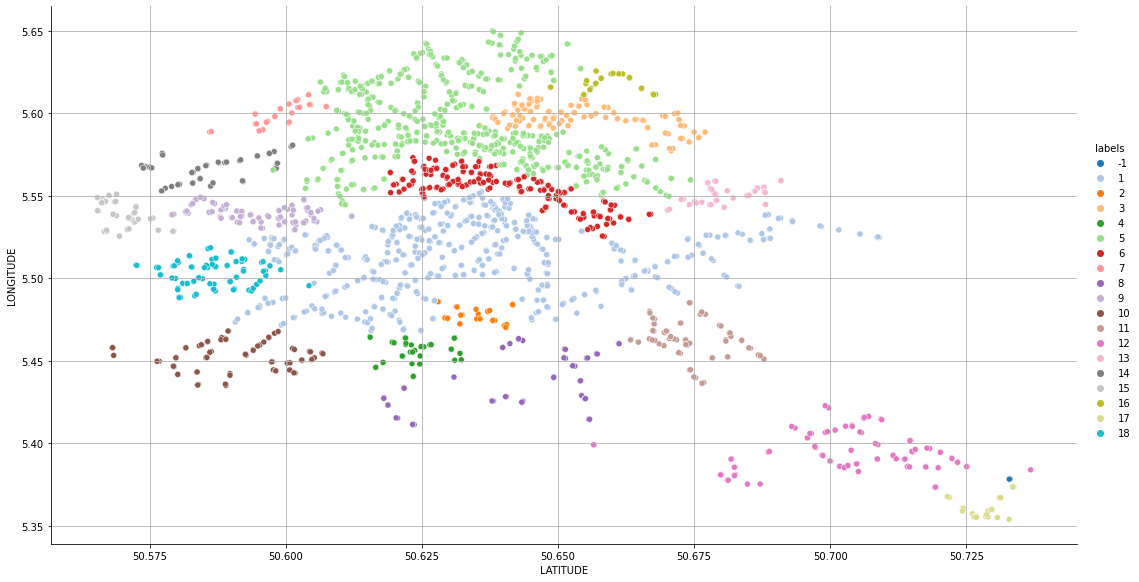

In [16]:

for i in range(-1, np.unique(labels).shape[0], 20):
    if i + 10 > np.unique(labels).shape[0]:
        df_tmp = df_new_place[df_new_place.labels >= i]
    else:
        df_tmp = df_new_place[(df_new_place.labels >= i) & (df_new_place.labels < i+20)]
    
    # plt.figure(figsize=(20, 15))
    
    sns.relplot(data=df_tmp, x='LATITUDE', y='LONGITUDE', 
                hue='labels', palette='tab20', kind='scatter',
                height=8, aspect=15/8)
    
    plt.grid()
    _ = plt.show()
    break
# figure level plot


In [17]:
for i in range(-1, np.unique(labels).shape[0], 1):
    

In [17]:
20 / df_tmp.shape[0]

0.007122507122507123

In [18]:
pd.set_option('mode.chained_assignment', None)

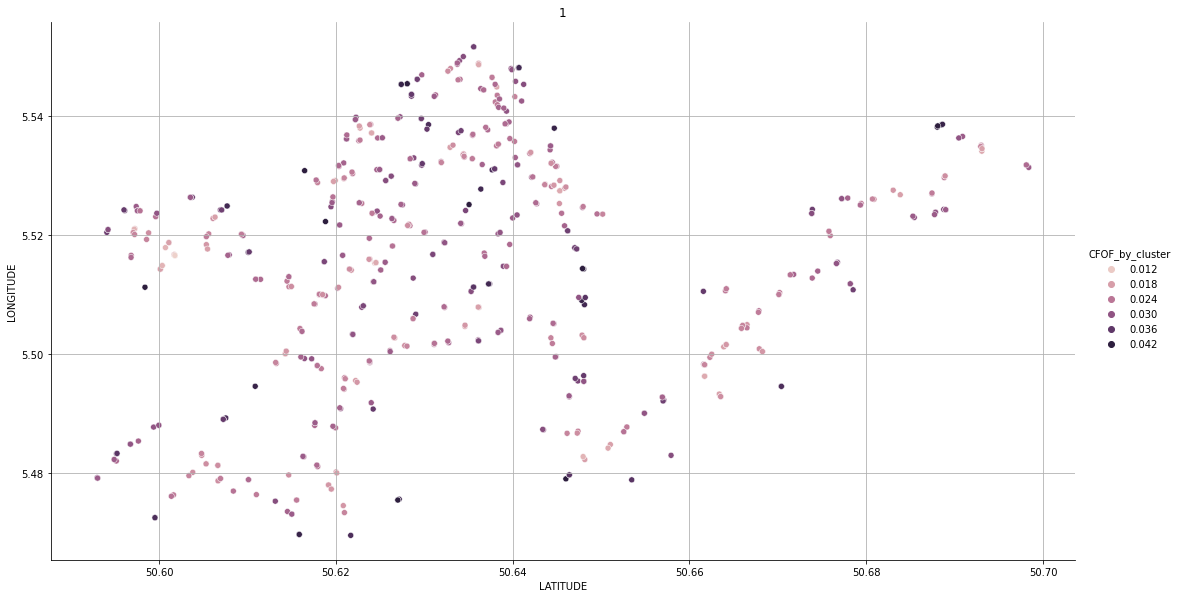

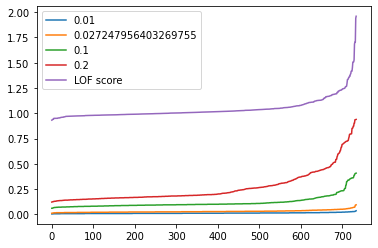

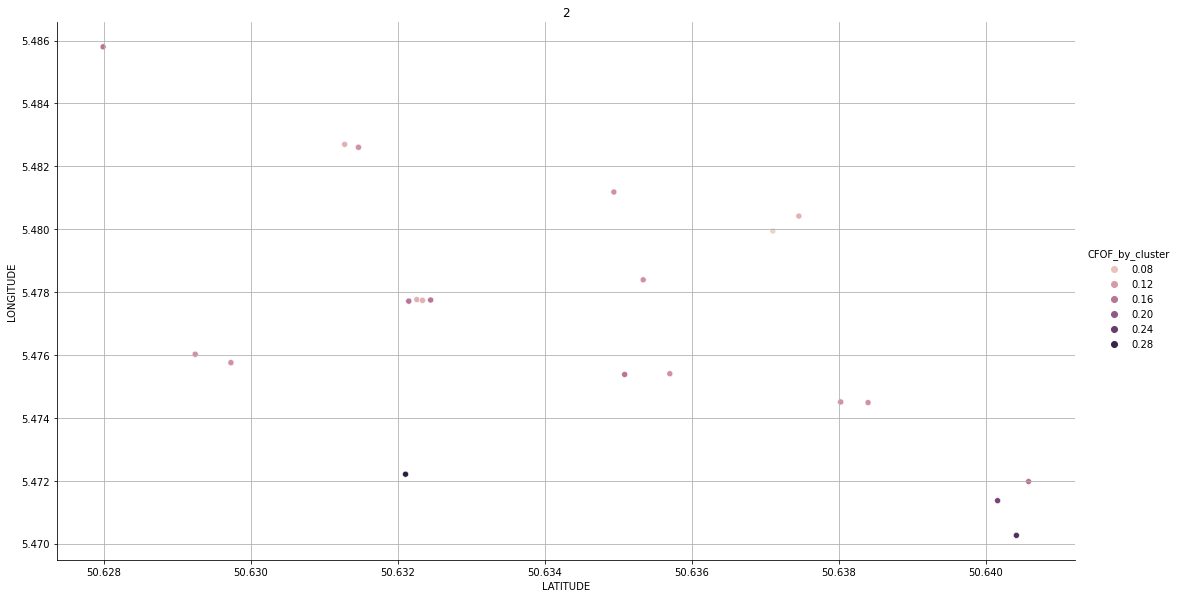

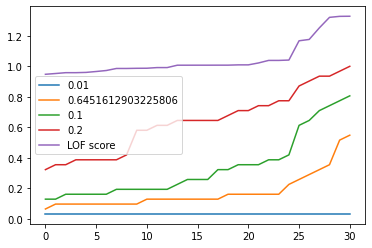

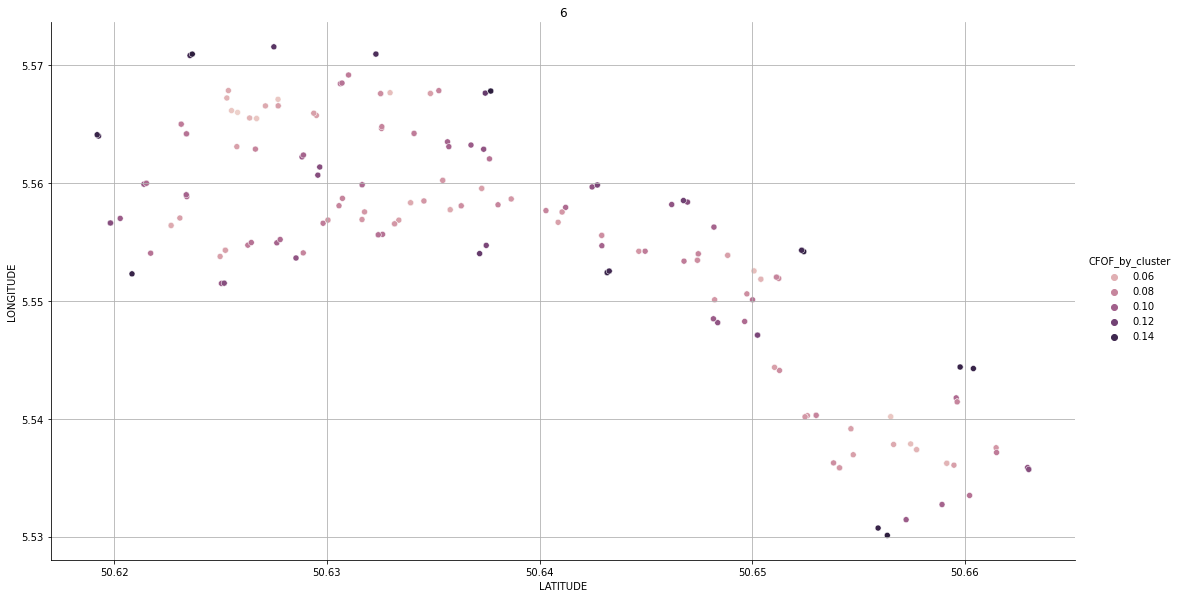

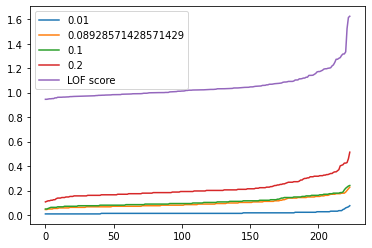

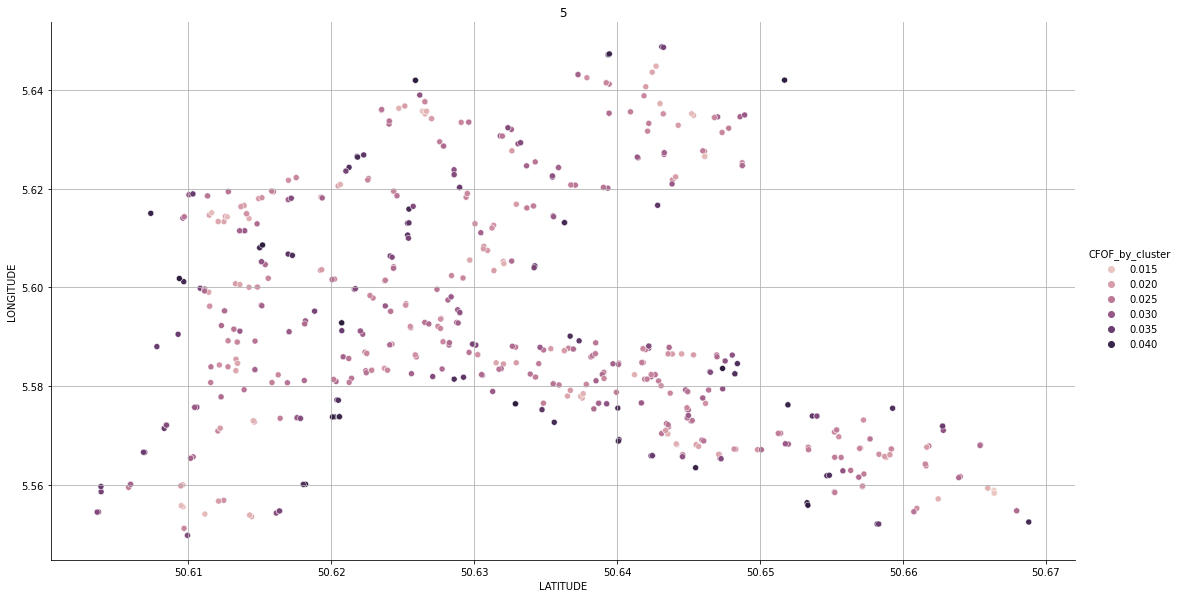

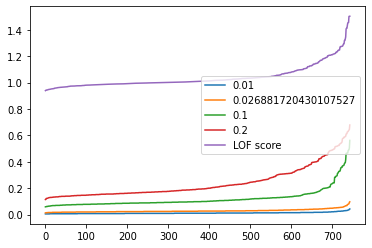

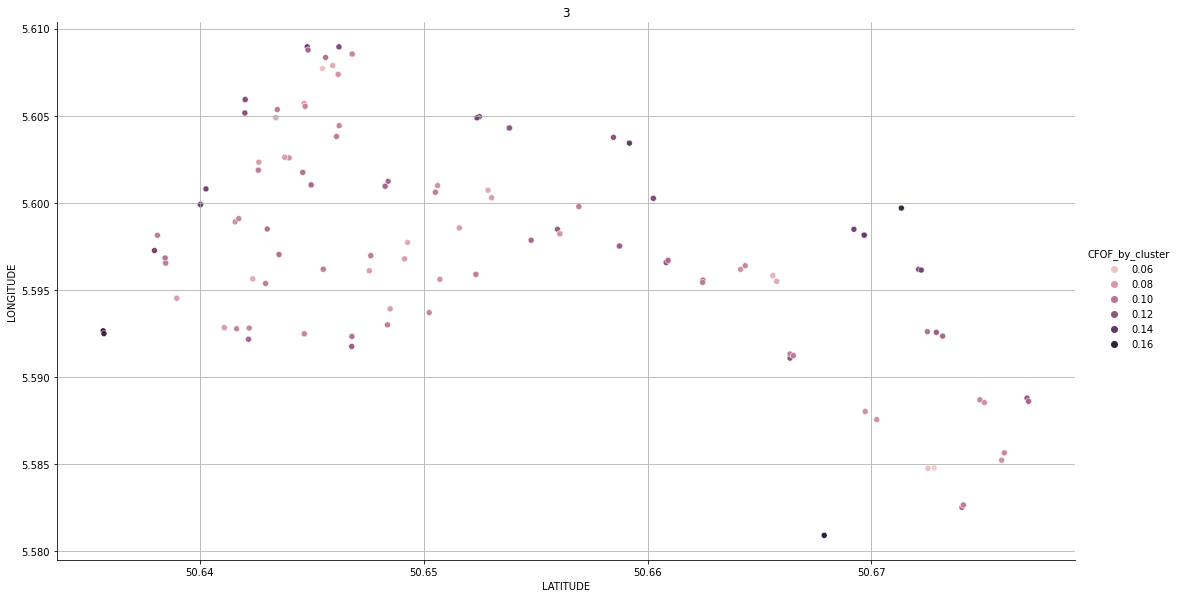

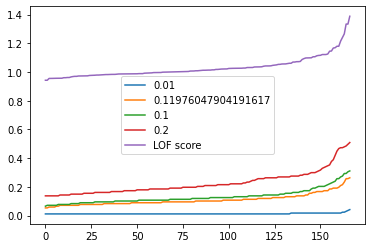

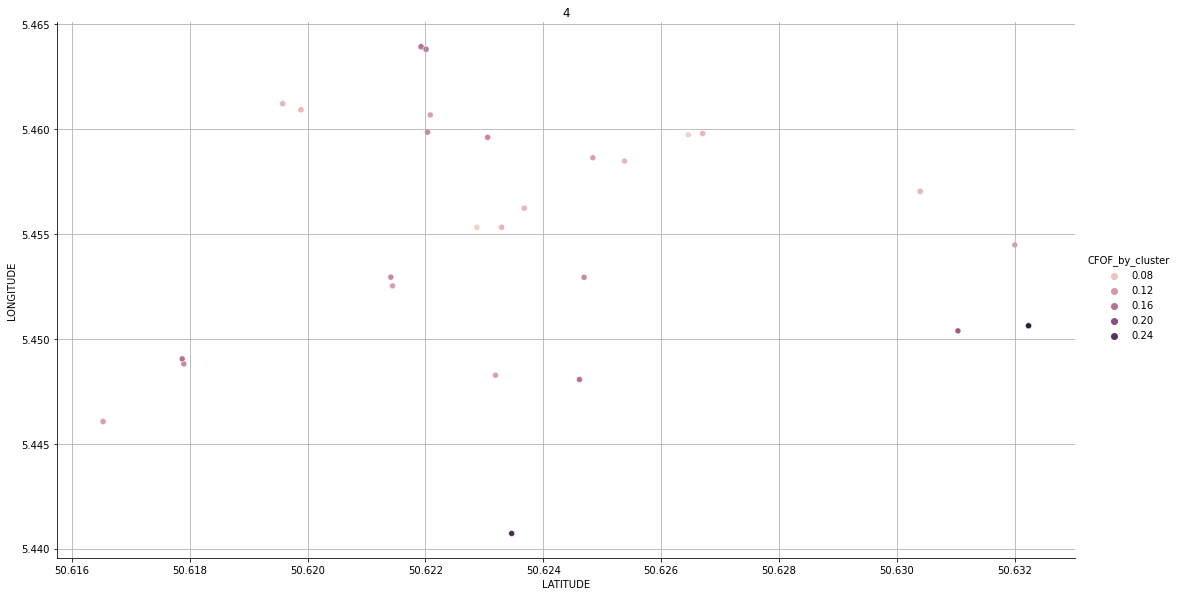

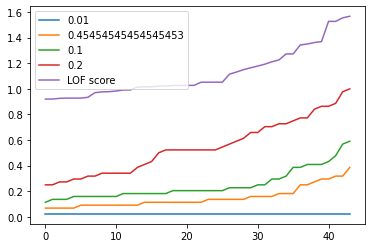

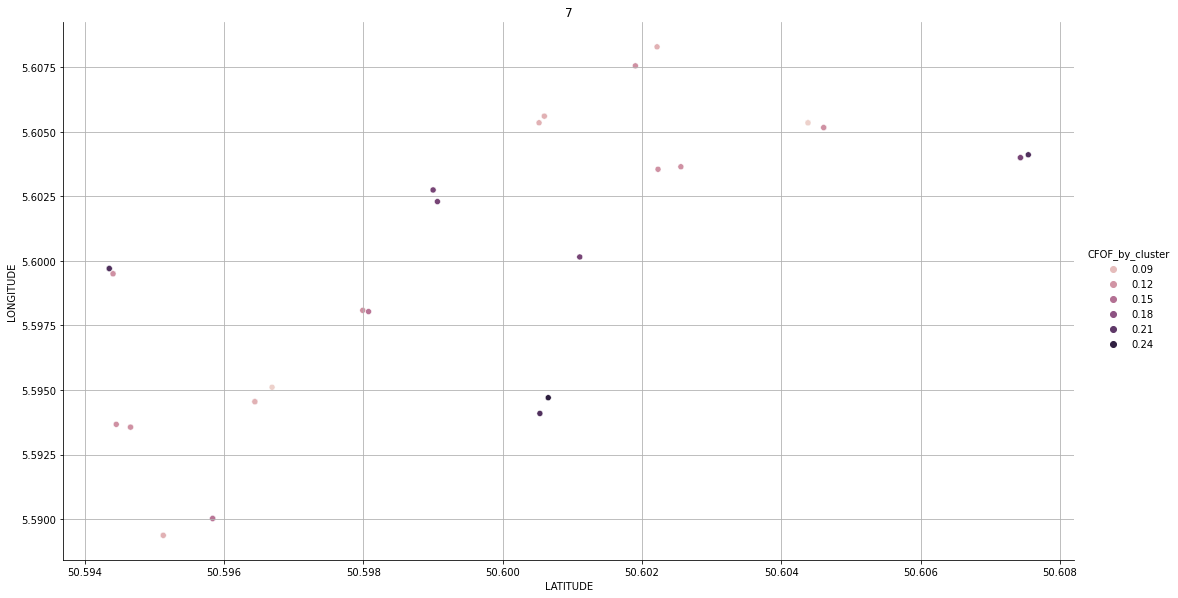

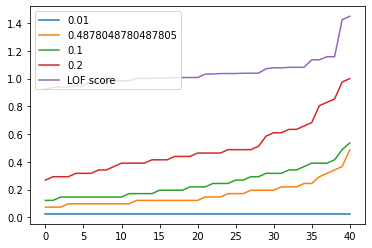

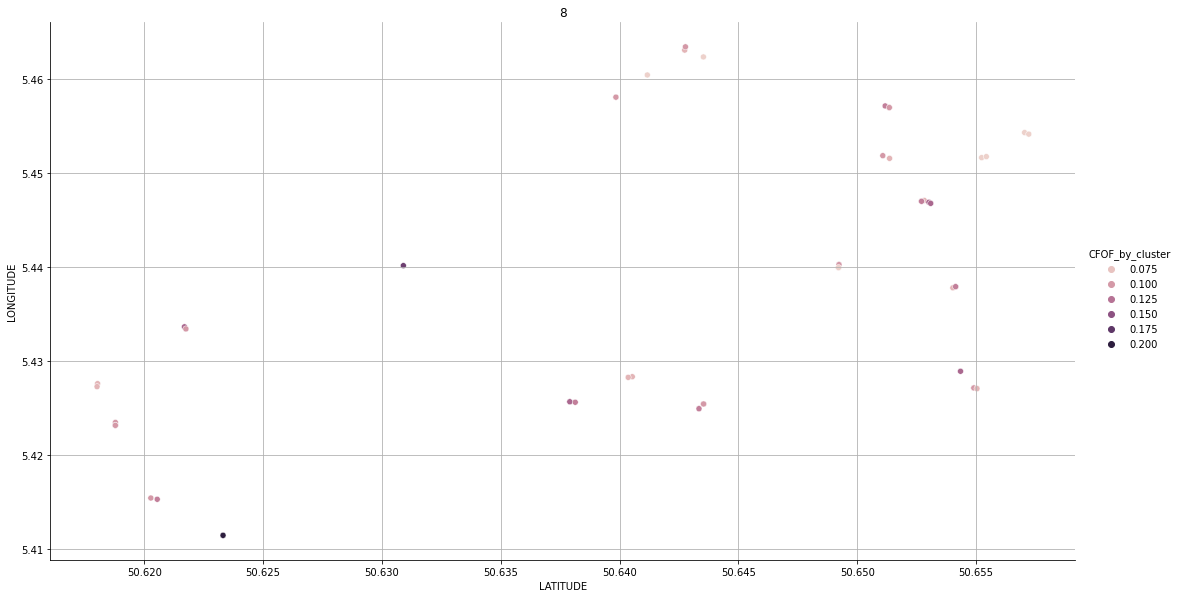

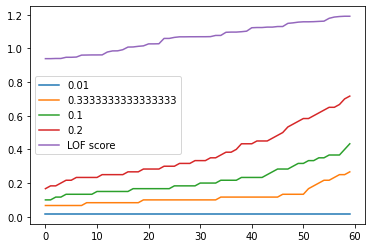

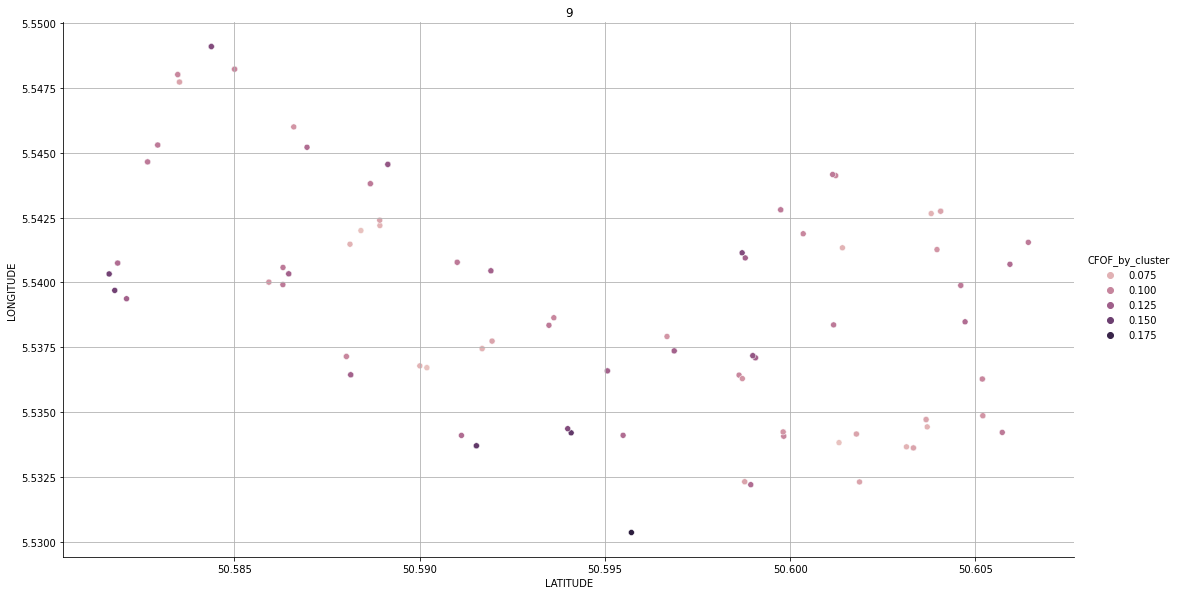

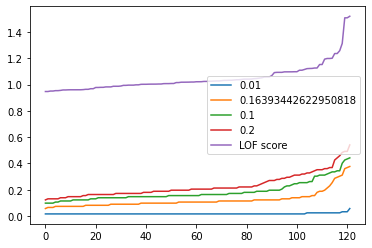

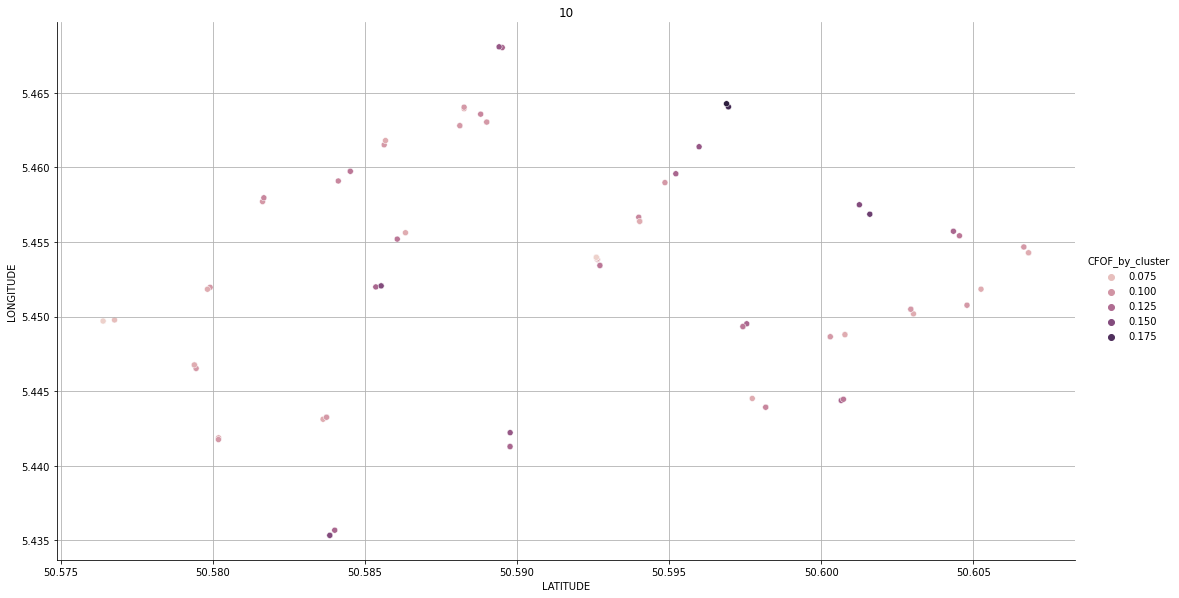

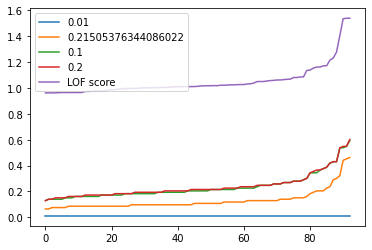

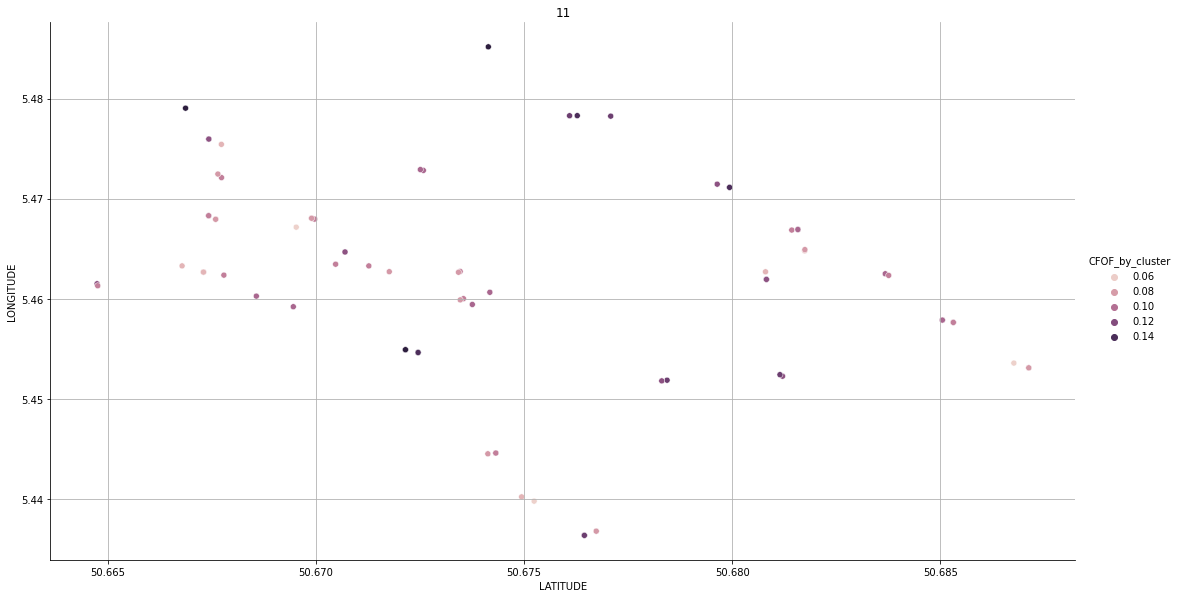

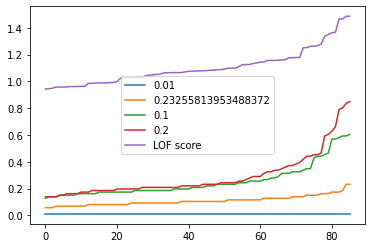

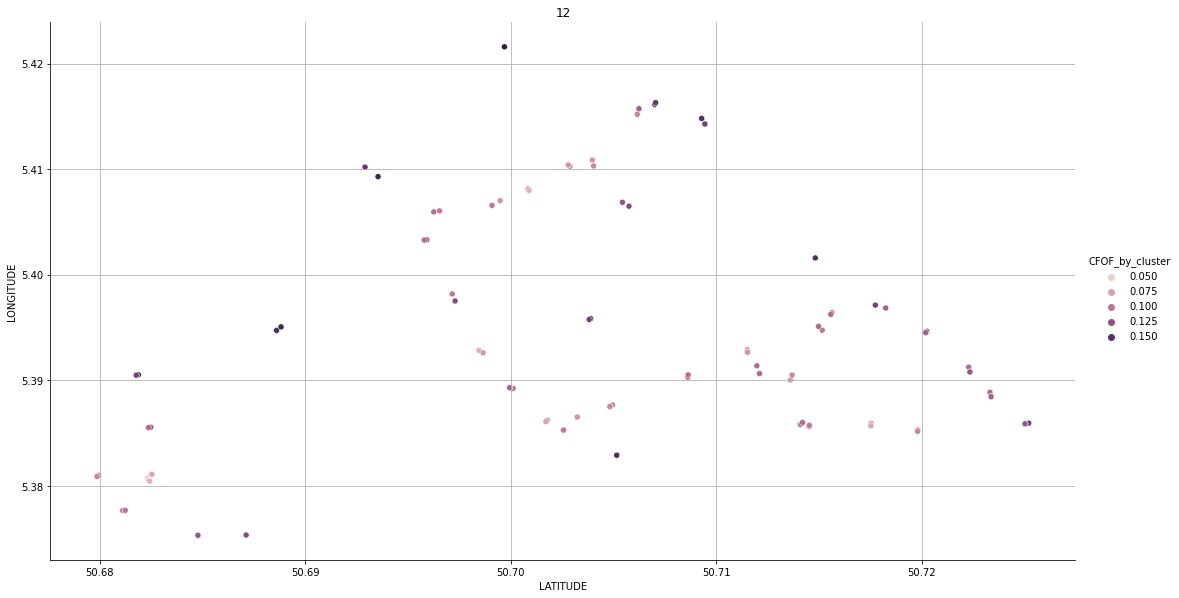

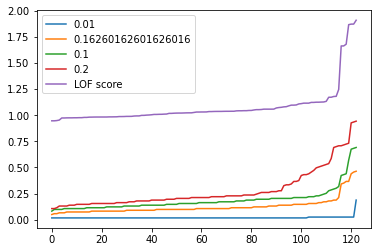

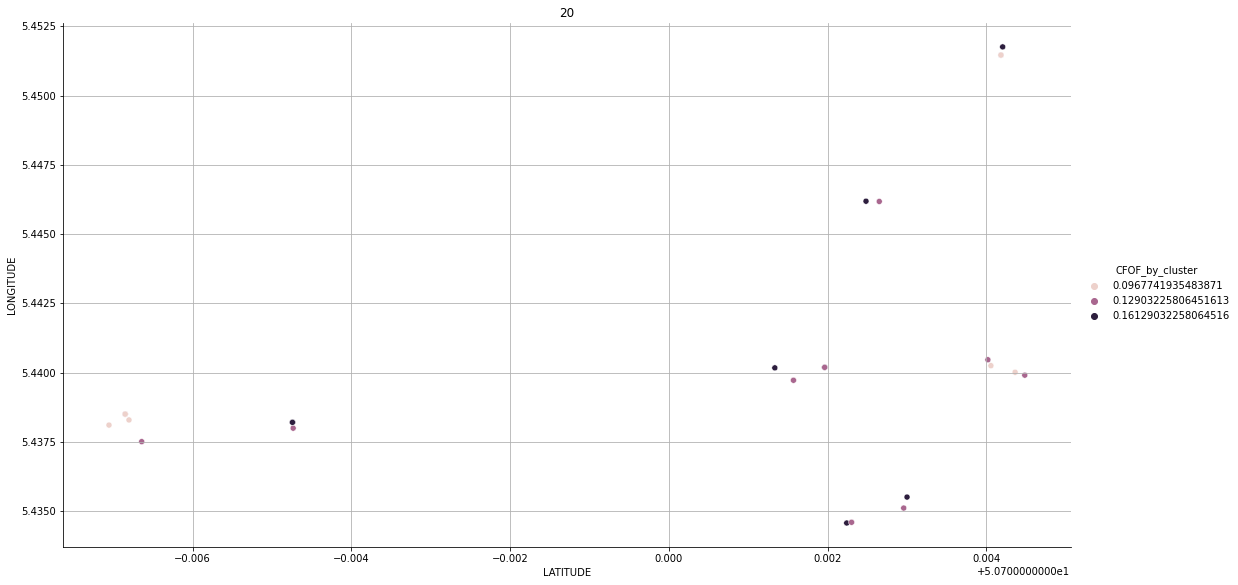

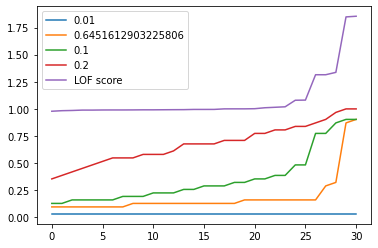

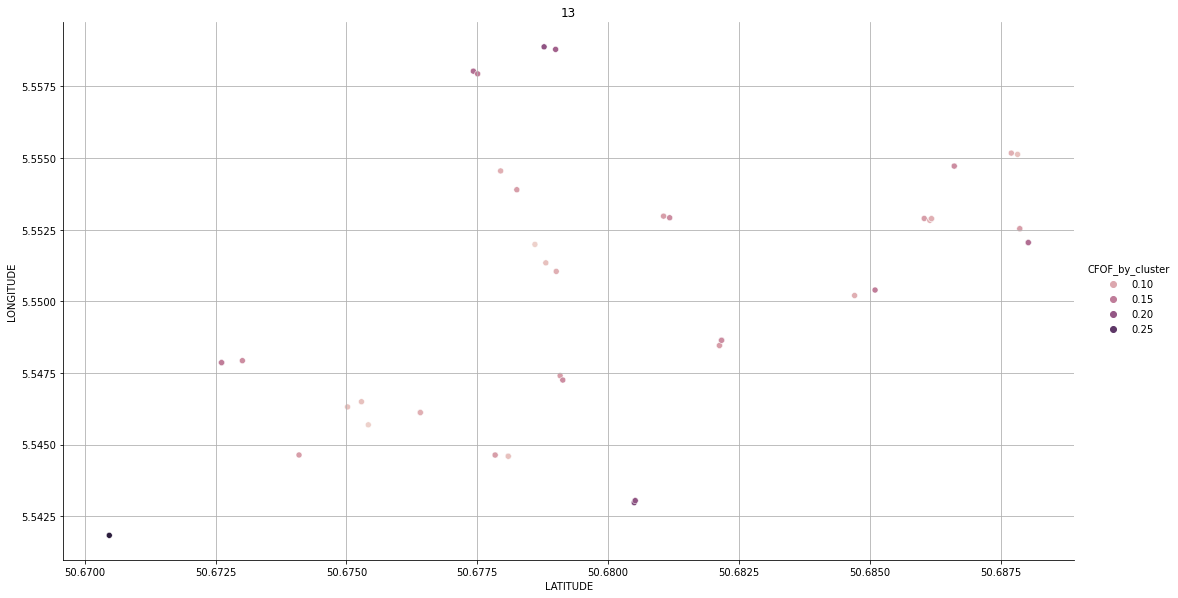

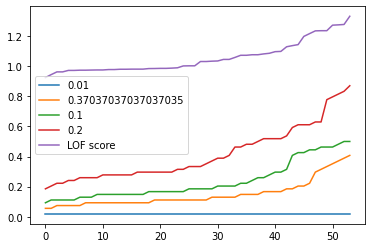

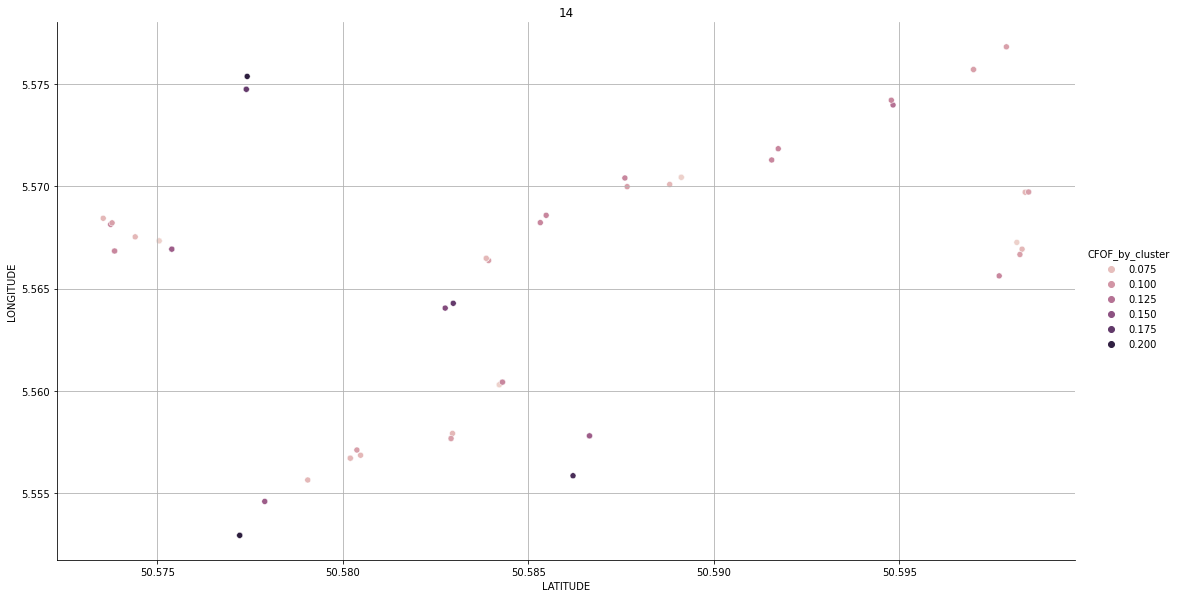

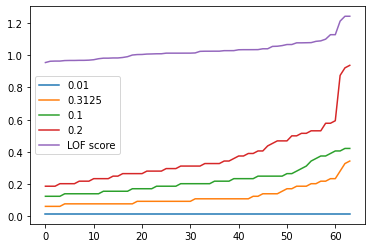

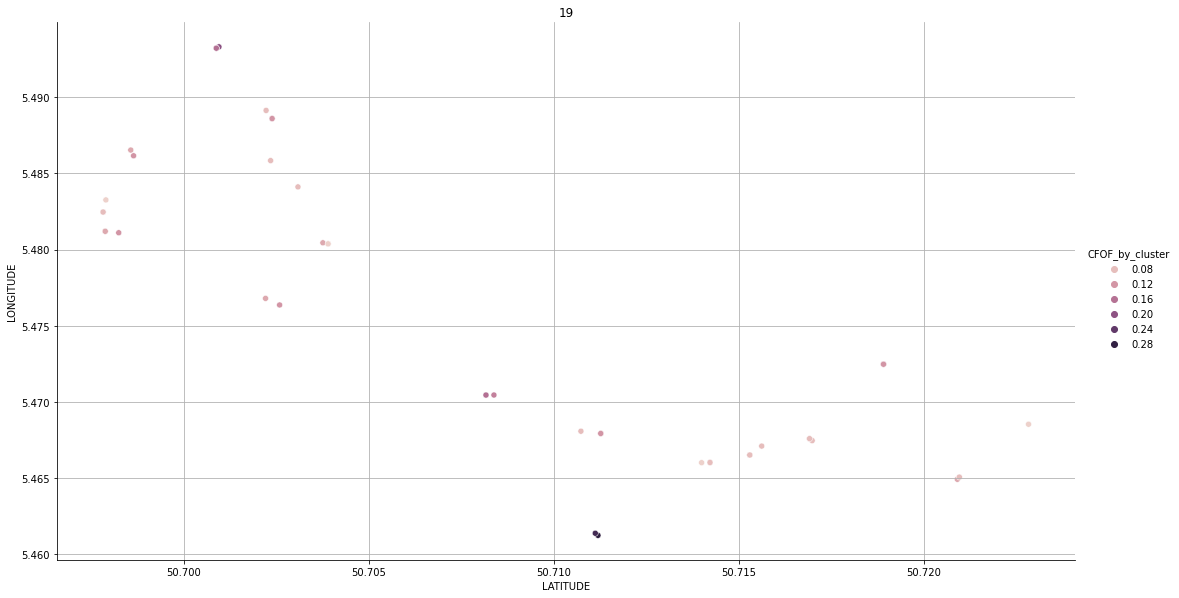

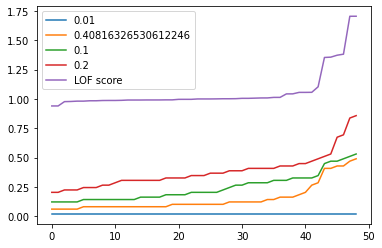

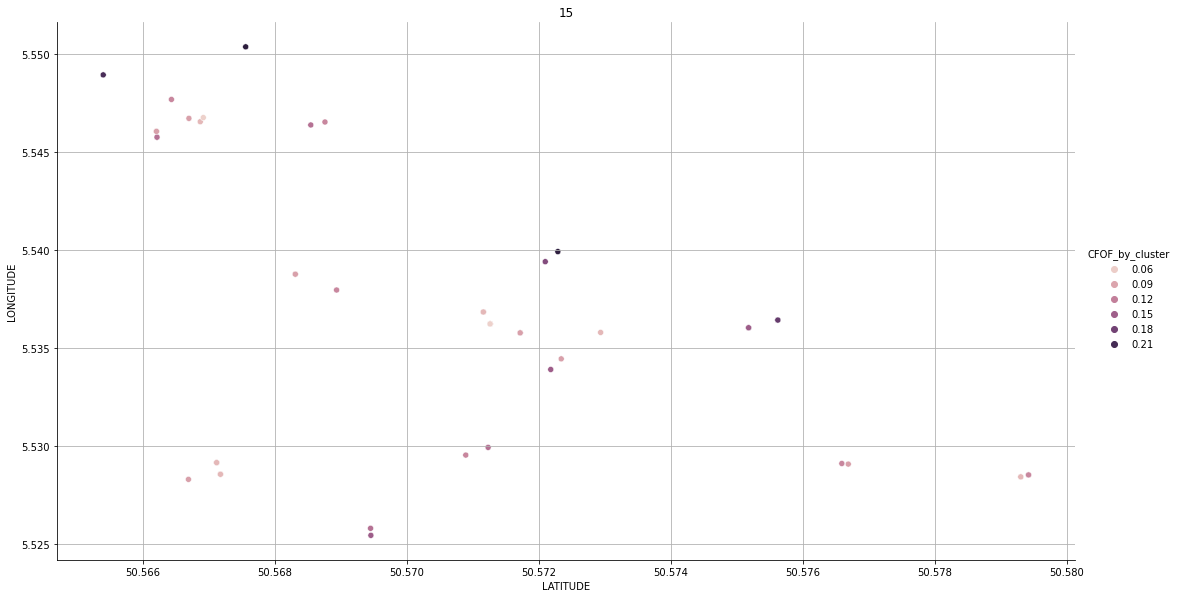

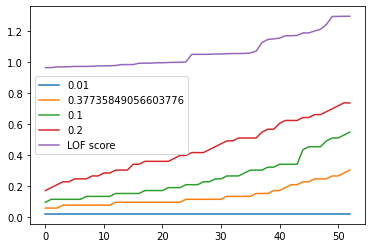

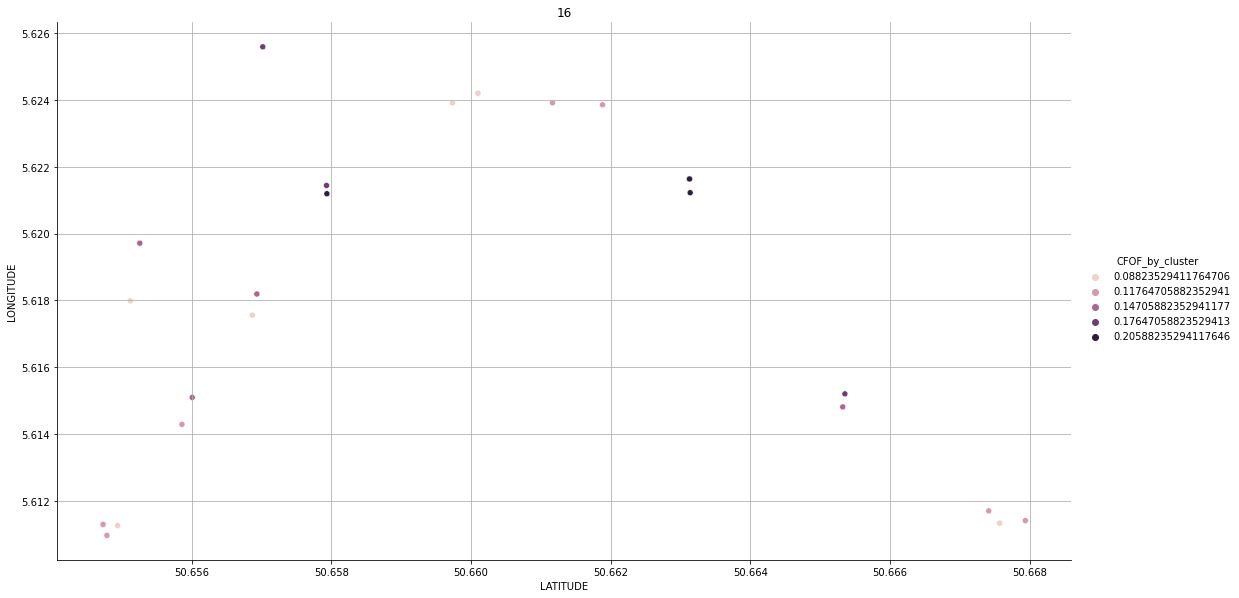

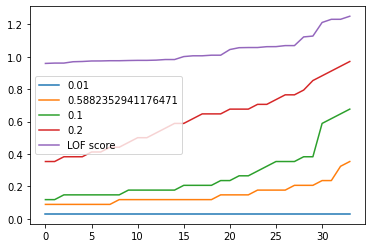

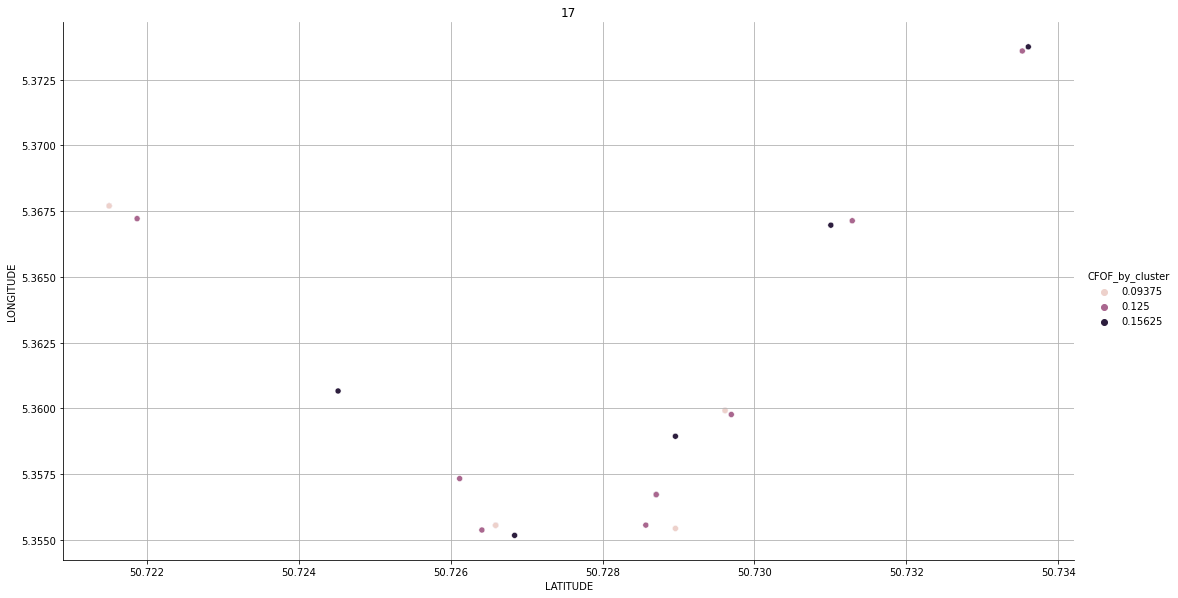

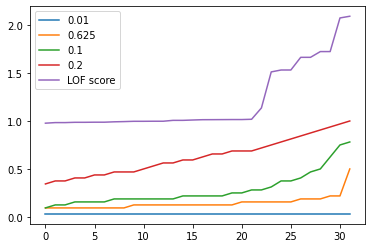

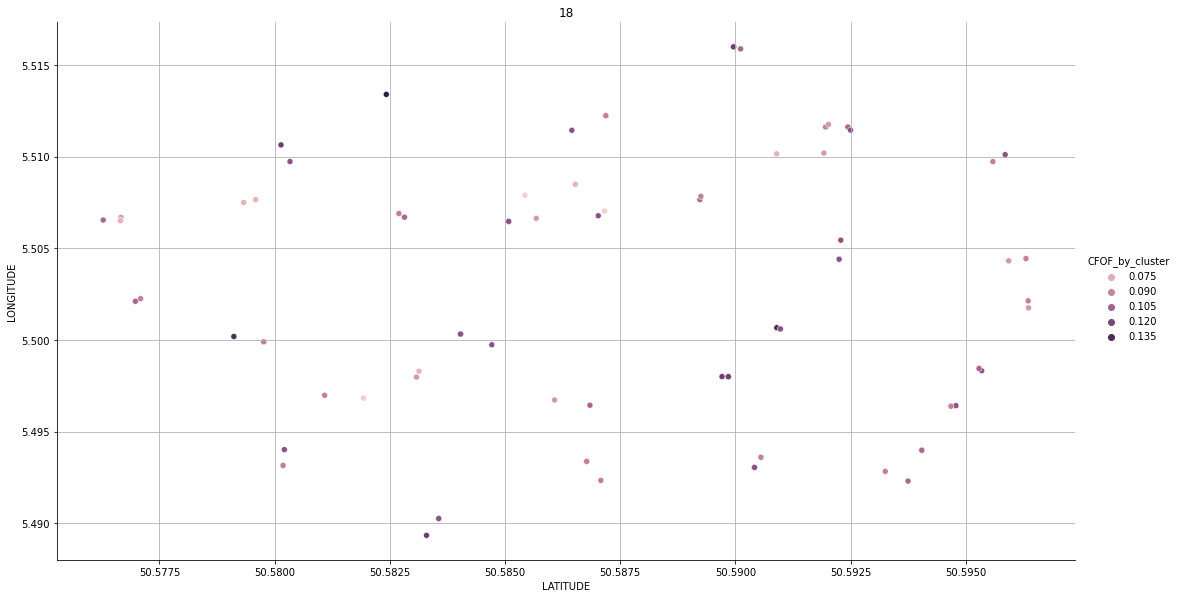

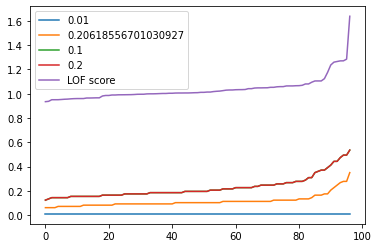

In [20]:
for lab in df_new_place.labels.unique():
    if lab == -1:
        continue
    df_tmp = df_new_place[df_new_place.labels == lab]
    
    rho_list = [0.01, 20 / df_tmp.shape[0], 0.1, 0.2]
    cfof = CFOF(n_neighbors=len(df_tmp[['LATITUDE', 'LONGITUDE']].to_numpy()), rho=rho_list)
    cfof.fit_predict(df_tmp[['LATITUDE', 'LONGITUDE']].to_numpy())
    
    clf = LocalOutlierFactor(n_neighbors=20)
    clf.fit_predict(df_tmp[['LATITUDE', 'LONGITUDE']].to_numpy())
    
    # df_tmp.loc[:, 'CFOF_by_cluster'] = np.squeeze(cfof.outlier_factor_, axis=1) # with 1 rho
    df_tmp['CFOF_by_cluster'] = cfof.outlier_factor_[:, 1]
    df_tmp['LOF_by_cluster'] =  - clf.negative_outlier_factor_
    sns.relplot(data=df_tmp[df_tmp['CFOF_by_cluster'] < df_tmp['CFOF_by_cluster'].quantile(.9)], 
                x='LATITUDE', y='LONGITUDE', 
                hue='CFOF_by_cluster', 
                # palette='tab20', kind='scatter',
                height=8, aspect=15/8)
    
    plt.title(lab)
    plt.grid()
    _ = plt.show()
    for dim in range(cfof.outlier_factor_.shape[1]):
        plt.plot(sorted(cfof.outlier_factor_[:, dim]), label=rho_list[dim])
    plt.plot(sorted(df_tmp['LOF_by_cluster']), label="LOF score")
    plt.legend()
    # break

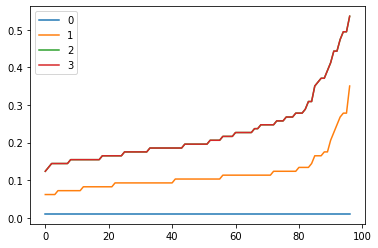

In [21]:
for dim in range(cfof.outlier_factor_.shape[1]):
    plt.plot(sorted(cfof.outlier_factor_[:, dim]), label=dim)
plt.legend()

In [22]:
cfof = CFOF(n_neighbors=len(df_new_place[['LATITUDE', 'LONGITUDE']].to_numpy()), rho=[0.01])

In [23]:
cfof.fit_predict(df_new_place[['LATITUDE', 'LONGITUDE']].to_numpy())

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [24]:
df_new_place.loc[:, 'CFOF'] = np.squeeze(cfof.outlier_factor_, axis=1)

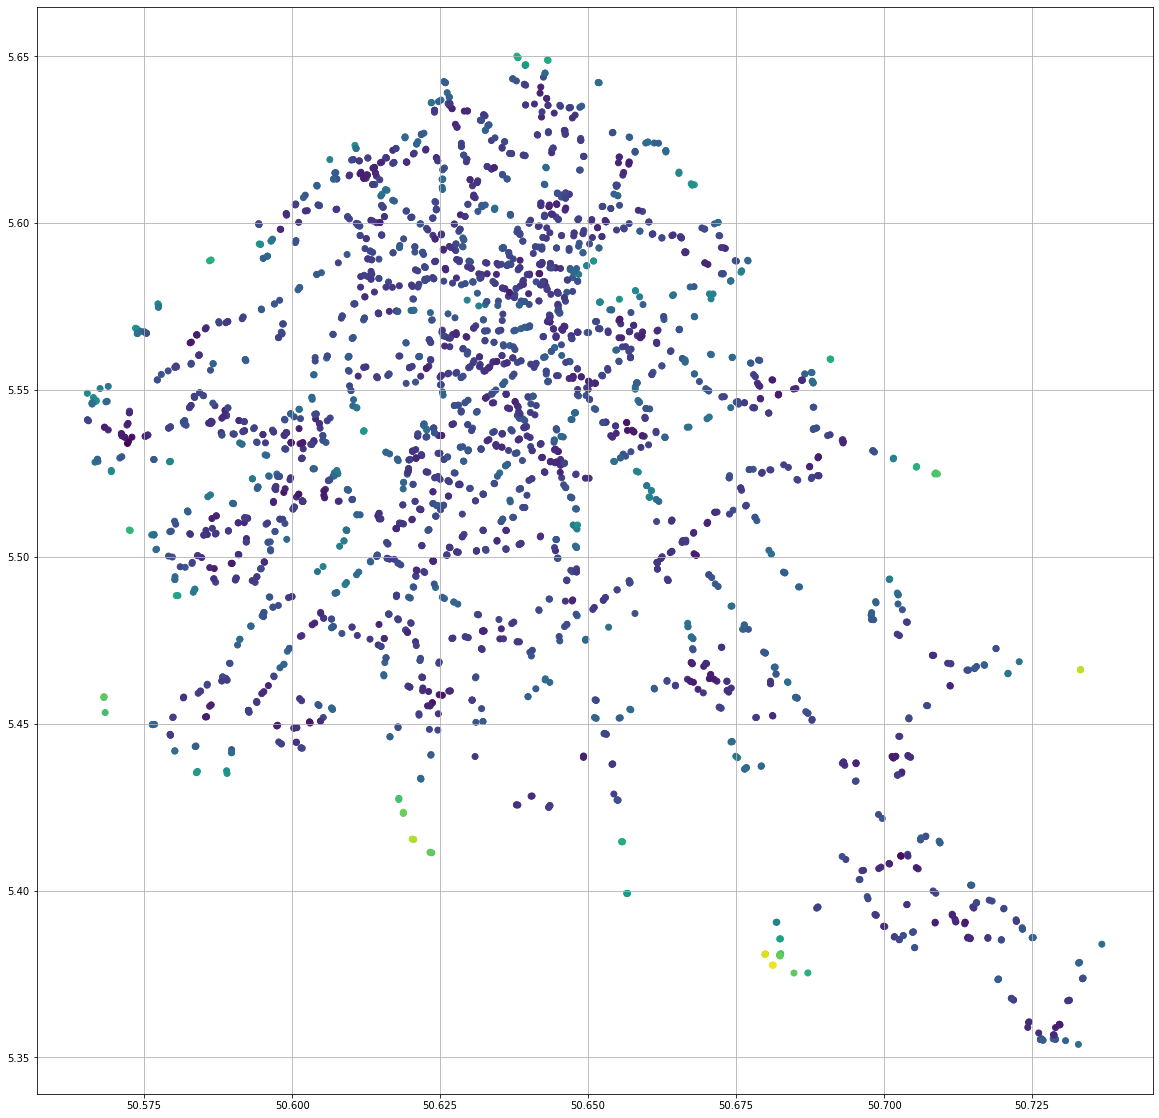

In [25]:
plt.figure(figsize=(20,20))

plt.scatter(df_new_place.LATITUDE, df_new_place.LONGITUDE,
            # s=1.0, 
            c=df_new_place.CFOF)
plt.grid()

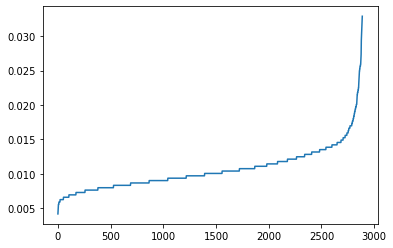

In [26]:
plt.plot(sorted(cfof.outlier_factor_))